In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
df = pd.read_csv(r"C:\Users\dell\Desktop\assignment\Fraud_check (1).csv")

In [5]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.shape

(600, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


## Feature Engineering

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [11]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [12]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [14]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'taxable_category'], dtype='object')

In [15]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

### Visualization

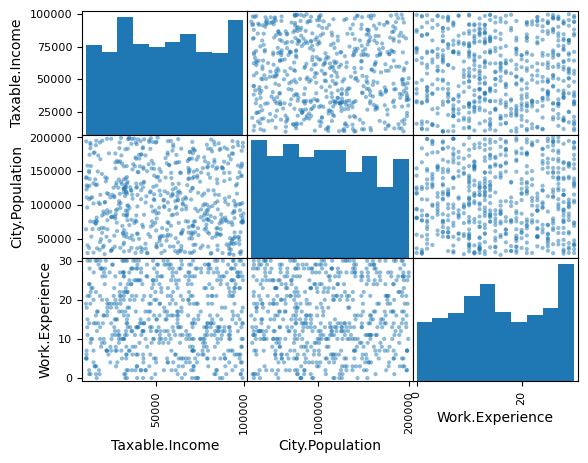

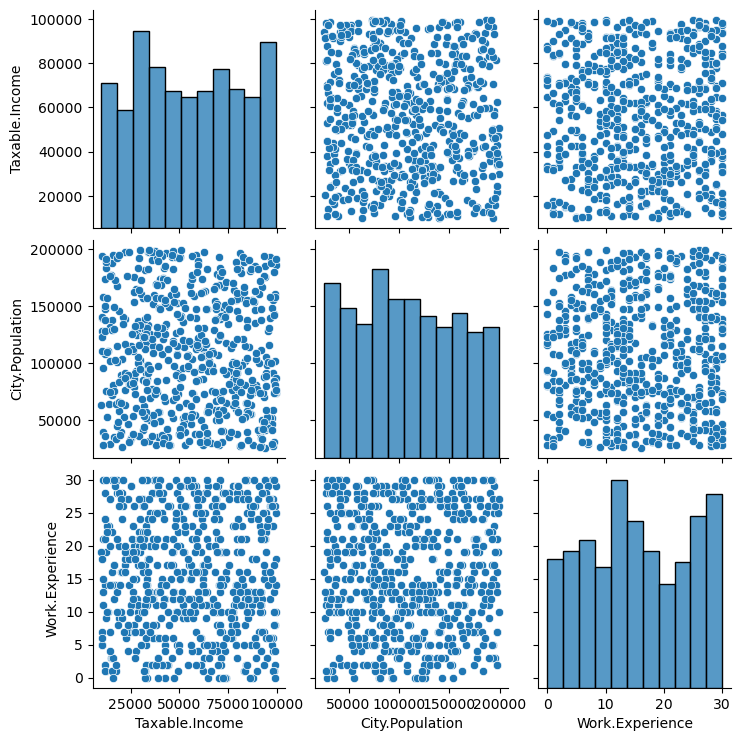

In [16]:
pd.plotting.scatter_matrix(df)
sns.pairplot(df)

In [18]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

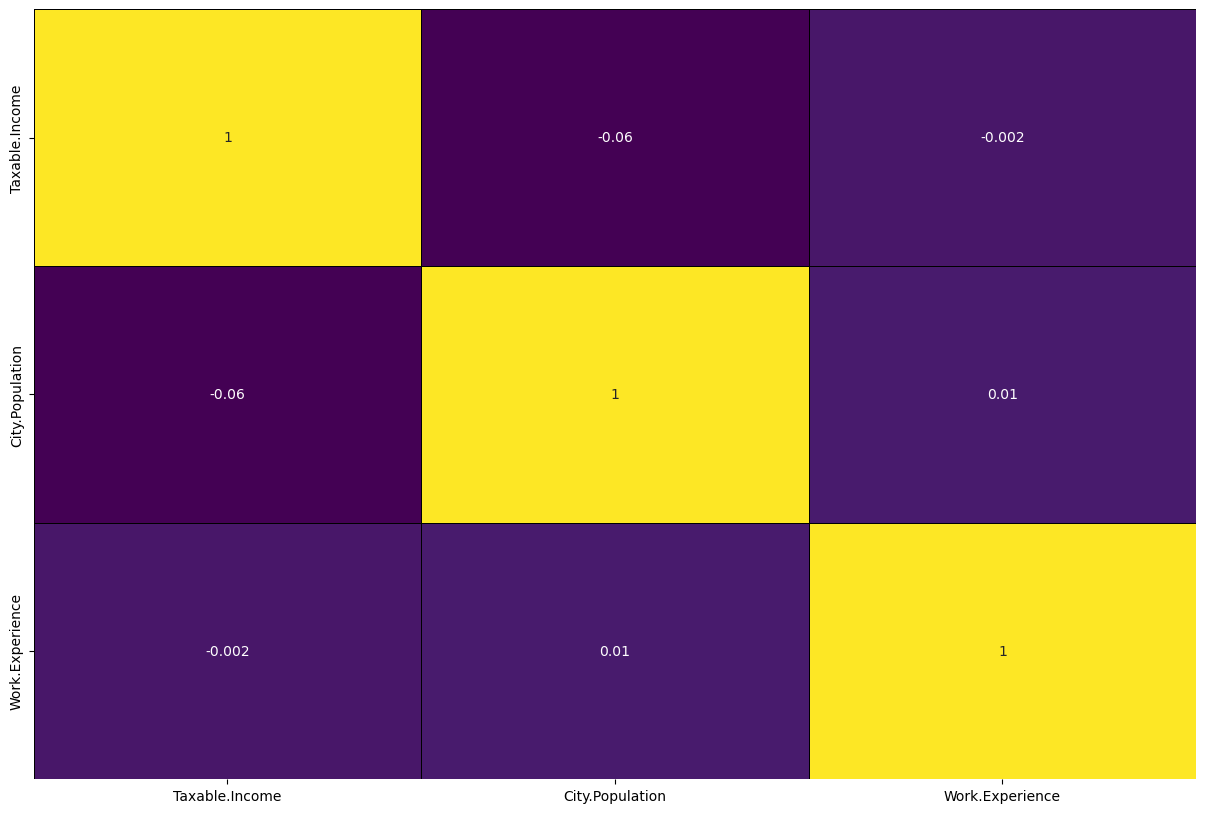

In [19]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

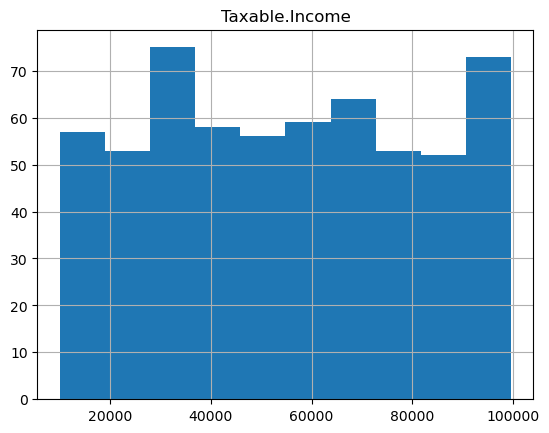

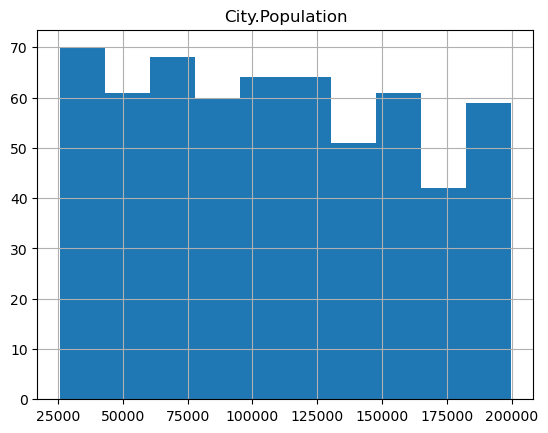

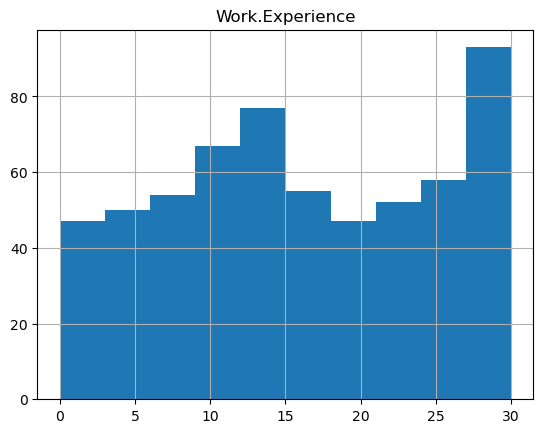

In [20]:
## histogram
for col_name in numerical_features.values:
    df.hist(column=col_name)

<AxesSubplot:>

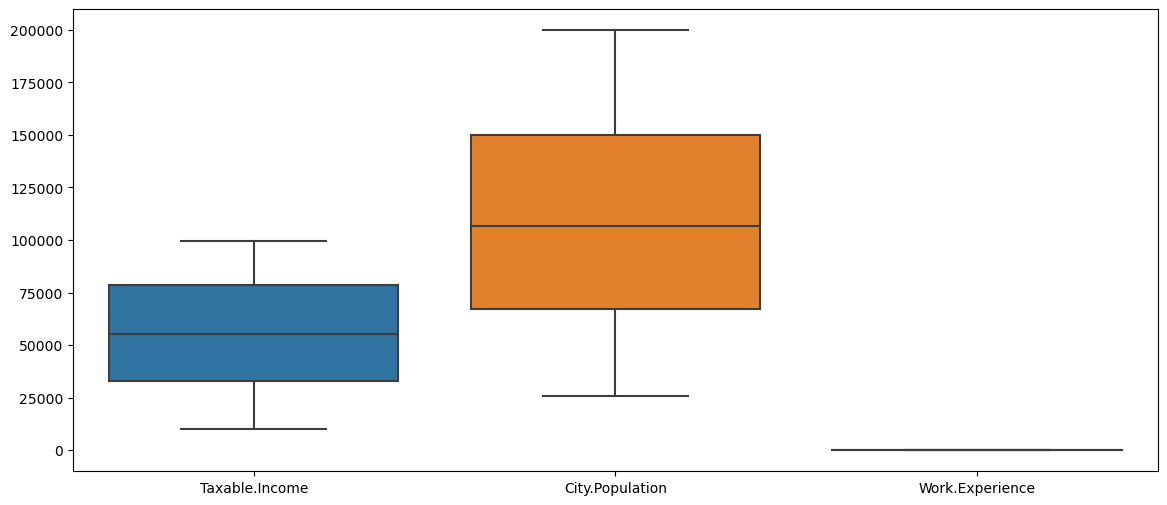

In [21]:
## check outliers using boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features])

<AxesSubplot:>

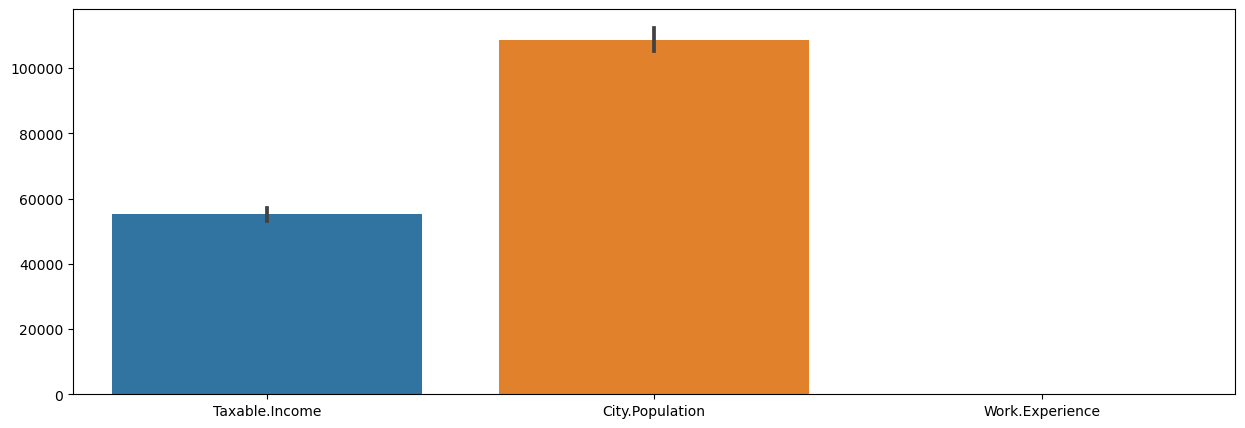

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=df[numerical_features])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

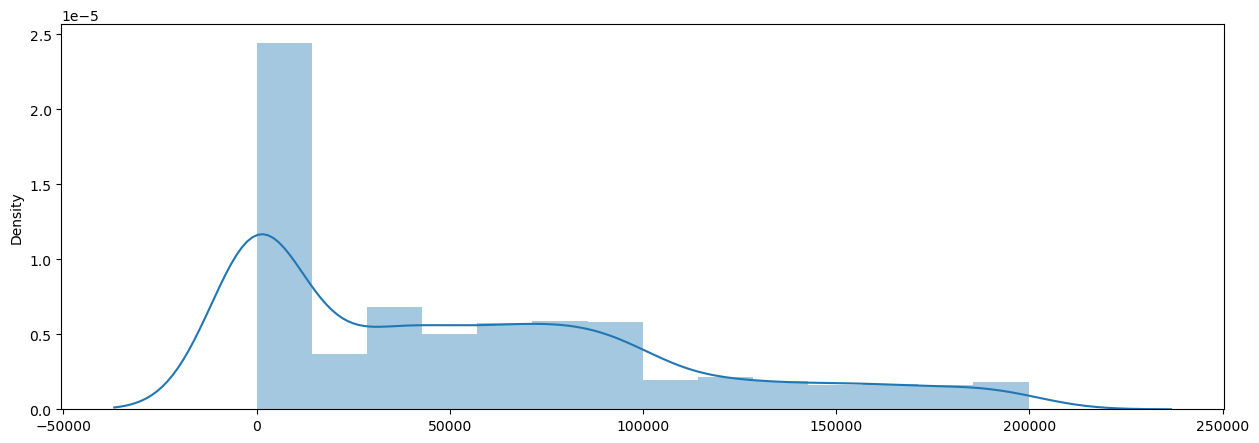

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(df[numerical_features])

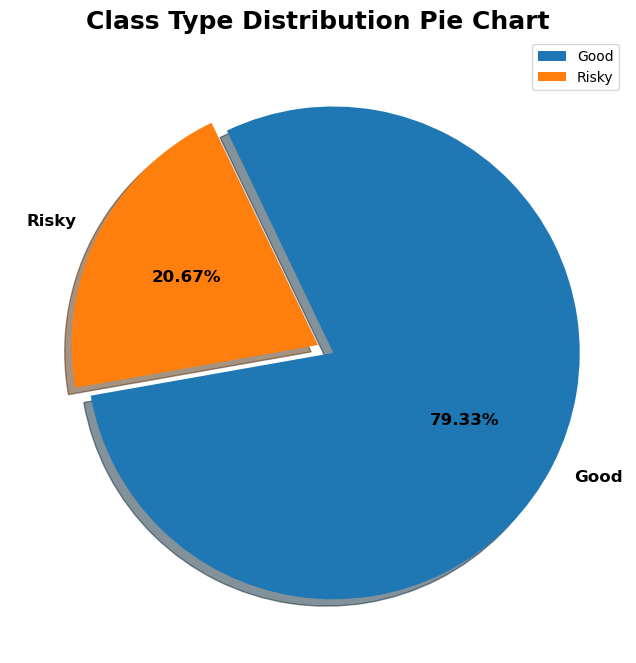

In [25]:
plt.figure(figsize = (12,8))
plt.pie(df1['taxable_category'].value_counts(),
       labels=df1.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##  Feature Selection Technique

### Data Pre-Processing

In [27]:
model_data = df1.copy()
model_data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
model_data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = model_data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [28]:
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(model_data[col])
        model_data[col] = le.transform(model_data[col])
model_data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [29]:
data_ = df1.copy()
data_.drop('Taxable.Income',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [30]:
data_['Taxable_Income'] = df1.taxable_category
data_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


In [31]:
le = LabelEncoder()
le.fit(data_["Taxable_Income"])
data_["Taxable_Income"]=le.transform(data_["Taxable_Income"])
data_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


In [34]:
# split into input (X) and output (y) variables
x = data_.iloc[:, :-1]

y=  data_.Taxable_Income

In [35]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int32

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [38]:
x_train.shape,y_train.shape

((480, 9), (480,))

In [39]:
x_test.shape,y_test.shape

((120, 9), (120,))

## Building a random Forest model using Gini index

In [40]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9,random_state=0,)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [41]:
# training data
y_train_pred = rf_model.predict(x_train)

In [42]:
accuracy_score(y_train,y_train_pred)

0.9333333333333333

In [43]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.71      0.83       111

    accuracy                           0.93       480
   macro avg       0.96      0.86      0.90       480
weighted avg       0.94      0.93      0.93       480



In [44]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [ 32,  79]], dtype=int64)

In [45]:
# testing data
y_test_pred = rf_model.predict(x_test)

In [46]:
accuracy_score(y_test,y_test_pred)

0.8583333333333333

In [47]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.86       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.86      0.82       120



In [48]:
confusion_matrix(y_test,y_test_pred)

array([[103,   4],
       [ 13,   0]], dtype=int64)

## Building a model using Entropy

In [49]:
rf_model2 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=0)
rf_model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=0)

In [50]:
y_train_pred2 = rf_model2.predict(x_train)

In [51]:
accuracy_score(y_train,y_train_pred2)

0.9583333333333334

In [52]:
confusion_matrix(y_train,y_train_pred2)

array([[369,   0],
       [ 20,  91]], dtype=int64)

In [53]:
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       1.00      0.82      0.90       111

    accuracy                           0.96       480
   macro avg       0.97      0.91      0.94       480
weighted avg       0.96      0.96      0.96       480



In [54]:
 # testing data
y_test_pred2 = rf_model2.predict(x_test)  

In [55]:
accuracy_score(y_test,y_test_pred2)

0.8416666666666667

In [56]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       107
           1       0.00      0.00      0.00        13

    accuracy                           0.84       120
   macro avg       0.44      0.47      0.46       120
weighted avg       0.79      0.84      0.82       120



In [57]:
confusion_matrix(y_test,y_test_pred2)

array([[101,   6],
       [ 13,   0]], dtype=int64)

## Build a model using hyperparameter Randamized search cv

In [58]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [59]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [60]:
rf_clf = RandomForestClassifier(random_state=42)

In [61]:
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [62]:
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True})


In [63]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1)

In [64]:
rf_best = rf_cv.best_estimator_
rf_best


RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1, random_state=42)

In [65]:
y_train_predict3 = rf_cv.predict(x_train)

In [66]:
accuracy_score(y_train,y_train_predict3)

0.7395833333333334

In [67]:
confusion_matrix(y_train,y_train_predict3)

array([[330,  39],
       [ 86,  25]], dtype=int64)

In [68]:
print(classification_report(y_train,y_train_predict3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       369
           1       0.39      0.23      0.29       111

    accuracy                           0.74       480
   macro avg       0.59      0.56      0.56       480
weighted avg       0.70      0.74      0.71       480



In [69]:
# testing data
y_test_pred4 = rf_cv.predict(x_test)

In [70]:
accuracy_score(y_test,y_test_pred4)

0.7916666666666666

In [71]:
confusion_matrix(y_test,y_test_pred4)

array([[93, 14],
       [11,  2]], dtype=int64)

In [72]:
print(classification_report(y_test,y_test_pred4))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       107
           1       0.12      0.15      0.14        13

    accuracy                           0.79       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.81      0.79      0.80       120



## Accuracy after tunnung is 79% which is best .